# Preprocessing

In [1]:
import numpy as np
import os
import cv2

In [2]:
person = 40
image = 10

image_dir = "./p1_data"
images = []
labels = []
test_images = []
test_labels = []
all_images = []
all_labels = []

In [3]:
for p in range(1,person+1):
    temp = []
    for i in range(1,image+1):
        file_name = str(p) + "_" + str(i) + ".png"
        img = cv2.imread(os.path.join(image_dir,file_name),cv2.IMREAD_GRAYSCALE)
        temp.append(img)
        new_img = img.reshape(img.shape[0]*img.shape[1])
        if i < 10:
            images.append(new_img)
            labels.append(p)
        else:
            test_images.append(new_img)
            test_labels.append(p)
        all_images.append(new_img)
        all_labels.append(p)

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Question 1

In [5]:
pca = PCA(n_components=360)
pca.fit(images)

PCA(n_components=360)

In [6]:
pca.components_.shape

(360, 2576)

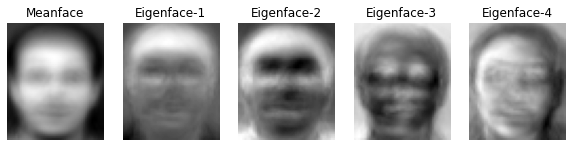

In [7]:
fig = plt.figure(figsize=(10, 10))

fig.add_subplot(1, 5, 1)

plt.imshow(np.mean(images,axis=0).reshape((56,46)),cmap='gray')
plt.axis('off')
plt.title("Meanface")

fig.add_subplot(1, 5, 2)

plt.imshow(pca.components_[0].reshape((56,46)),cmap='gray')
plt.axis('off')
plt.title("Eigenface-1")

fig.add_subplot(1, 5, 3)

plt.imshow(pca.components_[1].reshape((56,46)),cmap='gray')
plt.axis('off')
plt.title("Eigenface-2")

fig.add_subplot(1, 5, 4)

plt.imshow(pca.components_[2].reshape((56,46)),cmap='gray')
plt.axis('off')
plt.title("Eigenface-3")

fig.add_subplot(1, 5, 5)

plt.imshow(pca.components_[3].reshape((56,46)),cmap='gray')
plt.axis('off')
plt.title("Eigenface-4")

plt.show()

In [8]:
print(pca.explained_variance_[0]>pca.explained_variance_[3])

True


# Question 2 & 3

In [9]:
n = [3, 50, 170, 240, 345]
r_images = []

for i in n:
    pca = PCA(n_components=i).fit(images)
    components = pca.transform(all_images)
    reconstructed = pca.inverse_transform(components)
    
    r_images.append(reconstructed[70])

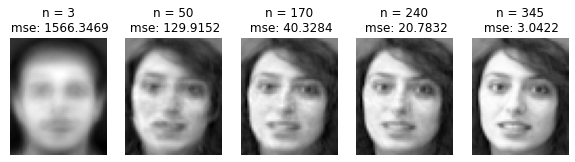

In [10]:
origin_img = all_images[70]

fig = plt.figure(figsize=(10, 10))

for i in range(len(n)):
    fig.add_subplot(1, len(n), i + 1)
    
    mse = np.square(np.subtract(origin_img,r_images[i])).mean()

    plt.imshow(r_images[i].reshape((56,46)),cmap='gray')
    plt.axis('off')
    title = "n = " + str(n[i]) + "\n mse: " + f'{mse:.4f}'
    plt.title(title)
    
    
plt.show()

# Question 4

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [14]:
ks = [1,3,5]
ns = [3,50,170]

best_score = 0.0
best_k = 0
best_n = 0

for k in ks:
    for n in ns:
        pca = PCA(n_components=n).fit(all_images)
        components = pca.transform(all_images)
        
        knn = KNeighborsClassifier(n_neighbors=k)

        scores = cross_val_score(knn,components,all_labels,cv=3, scoring='accuracy')
        
        print("k: " + f'{k}' + "\t\t n: " + f'{n}' + "\t\t acc: " + f'{scores.mean(): .4f}')
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_k = k
            best_n = n
print("-\n")
print("best accuracy: ", best_score)
print("best k: ", best_k)
print("best n: ", best_n)

k: 1		 n: 3		 acc:  0.6499
k: 1		 n: 50		 acc:  0.9725
k: 1		 n: 170		 acc:  0.9725
k: 3		 n: 3		 acc:  0.6150
k: 3		 n: 50		 acc:  0.9325
k: 3		 n: 170		 acc:  0.9225
k: 5		 n: 3		 acc:  0.5775
k: 5		 n: 50		 acc:  0.8826
k: 5		 n: 170		 acc:  0.8776
-

best accuracy:  0.9724871881195526
best k:  1
best n:  170


# Question 5

In [15]:
pca = PCA(n_components=best_n).fit(images)
train_components = pca.transform(images)
test_components = pca.transform(test_images)

knn = KNeighborsClassifier(n_neighbors=best_k)
        
knn.fit(train_components,labels)

score = knn.score(test_components,test_labels)

print('acc: ', score)

acc:  0.95
